In [1]:
from test_beta_package import *
%matplotlib inline

In [2]:
# confirm the folder structure and load the variables
path_data_folder, path_raw_data_folder, path_process_data_folder, path_top_folder, path_info_dir, path_analysis_dir, \
path_plots_dir, path_single_pred_dir, path_multi_pred_dir = folder_structure()

In [3]:
# load the processed pickle files  
data_continous_ratemaps, data_binned_glm = \
    processing_and_loading(path_raw_data_folder, path_process_data_folder, 
                           data_continous_ratemaps_pickle="rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl",
                           data_binned_glm_pickle="binned_4_GLM_rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl")


the continous dictionary is dict_keys(['output_file_prefix', 'exist_animal2', 'startaltbins', 'endaltbins', 'settings', 'session_indicator', 'frame_times', 'time_bins', 'framerate', 'overall_framerate', 'session_ts', 'tracking_ts', 'cell_names', 'cell_activities', 'dxs', 'dys', 'animal_location', 'possiblecovariates', 'possiblecovariatesnames', 'possiblecovariatesbounds', 'possiblecovariatesbins'])
the binned dictionary is dict_keys(['framerate', 'settings', 'cell_names', 'spk_mat', 'features_mat'])
the binned dictionary is [0. 0. 0. ... 0. 0. 0.]


In [4]:
# obtain the information from pickles
predictors_name_list, cells_id, animal_name = get_data_information(path_info_dir, data_continous_ratemaps)

In [5]:
# assign values to the inference parameters
dict_param = dict_parameters_hmm(path_info_dir, animal_name, num_dimen=1, num_categ_obs=2, N_iters=10,
                                 tolerance=10 ** -5, num_indep_neurons=1, num_predictors=4, max_num_states=3,
                                 observation_type="input_driven_obs",
                                 transistion_type="inputdriven", optim_method="em")

In [6]:
cells_index, tot_time = cells_selection_manual(path_info_dir, data_continous_ratemaps, data_binned_glm, dict_param, 'cells_selection.csv')

In [7]:
glmhmms_ista, process_neur, inpts, T, tot_masked_indices, path_plots_list, dict_objects_multicov = \
   data_structure_multipredictor(path_analysis_dir, path_info_dir, path_multi_pred_dir, data_continous_ratemaps,
                            data_binned_glm, dict_param, tot_time, cells_index, best_predictors='best_predictors.csv')

        Predictors'
0          B Speeds
1  G Neck_elevation
2  K Ego3_Head_roll
3      N Back_pitch
4  B Speeds_1st_der
the inputs format is [array([[ 10.6933533 ,   7.77147212,  14.95171273,  -8.59606193],
       [ 10.94194185,   7.73293056,  14.66348645,  -8.67050513],
       [ 11.20825033,   7.70454672,  14.19854536,  -9.21914885],
       ...,
       [  1.88188967,  11.14532455,   4.04407274, -11.50492634],
       [  1.93495419,  11.15501299,   4.32910028, -11.38794117],
       [  1.97855496,  11.16212476,   4.67918961, -11.25995607]])]
!Fraction missing points is 0.011952353757036795 for the model 0
!Fraction missing points is 0.011952353757036795 for the model 1


In [8]:
fit_ll_states_list, glmhmms_ista, time_states_comp = inference_section_multi_predictor(path_analysis_dir, path_info_dir, dict_param,
                                                                       glmhmms_ista=glmhmms_ista,
                                                                       process_neur=process_neur,
                                                                       inputs_list=inpts)

[[ 10.6933533    7.77147212  14.95171273  -8.59606193]
 [ 10.94194185   7.73293056  14.66348645  -8.67050513]
 [ 11.20825033   7.70454672  14.19854536  -9.21914885]
 ...
 [  1.88188967  11.14532455   4.04407274 -11.50492634]
 [  1.93495419  11.15501299   4.32910028 -11.38794117]
 [  1.97855496  11.16212476   4.67918961 -11.25995607]]


  0%|          | 0/10 [00:00<?, ?it/s]

computation time loop 0 is 8.667649030685425


  0%|          | 0/10 [00:00<?, ?it/s]

computation time loop 1 is 10.940544843673706
The total time for the inference is 19.60819387435913
the input list after inference is (4,)


In [ ]:
                           data_continous_ratemaps_pickle="rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl",
                           data_binned_glm_pickle="binned_4_GLM_rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl")

In [14]:
# posterior_probs_list = posterior_prob_process(path_info_dir, path_analysis_dir, dict_param, dict_processed_objects="a") # glmhmms_ista=glmhmms_ista, process_neur=process_neur, inputs_list=inputs_list)


AssertionError: 

In [16]:
%%capture cap --no-stderr
# take the cumulative occupancy per state
states_occupancies = states_occupancies_computation(path_analysis_dir, dict_posterior=0)

state of occupancy is [0.44150304 0.00851884 0.54997812]
3
<class 'numpy.ndarray'>


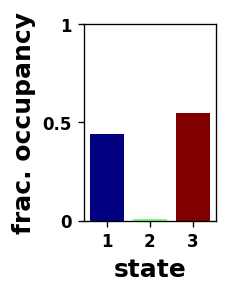

In [11]:
states_occupancies_histogram(path_analysis_dir, path_info_dir, dict_param=0, file_states_occup=0)

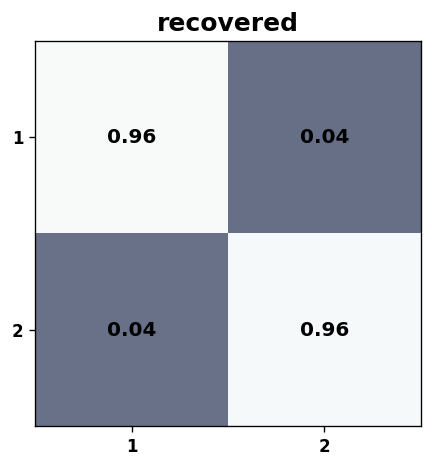

In [12]:
transition_prob_matrix(path_analysis_dir, path_info_dir, dict_param=0, dict_processed_objects=0)

In [13]:
weights_distribution_histogram(path_analysis_dir, path_info_dir, multi_predictor=0)

inferred and transformed weights are {'2_states': [array([[[0.50579631, 0.61765165, 0.4967354 , 0.49112938]],

       [[0.50941182, 0.60993179, 0.49929309, 0.48676435]]])], '3_states': [array([[[0.52342692, 0.60651543, 0.49759181, 0.48587894]],

       [[0.65531013, 0.60570465, 0.49330862, 0.49258285]],

       [[0.50806   , 0.61462306, 0.49908766, 0.48808817]]])]}


IndexError: index 4 is out of bounds for axis 2 with size 4